In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Text Mining

In [4]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [5]:
review=data['Review'][0]

In [6]:
review

'Wow... Loved this place.'

In [7]:
import re

In [8]:
review = re.sub('[^a-zA-Z]',' ',review)  #sub stands for substitute.

In [9]:
review=review.lower()

In [10]:
import nltk

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bajaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords

In [11]:
stp_list=["not","couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [14]:
sw=stopwords.words('english')

In [15]:
new_sw=[]
for word in sw:
    if word not in stp_list:
        new_sw.append(word)

In [16]:
review=review.split()

In [17]:
words=[]

for word in review:
    if(word not in sw):
        words.append(word)

In [18]:
words

[]

In [19]:
from nltk.stem.porter import PorterStemmer

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
wl=WordNetLemmatizer()

In [22]:
ps=PorterStemmer()

In [23]:
for word in review:
    if(word not in sw):
        words.append(ps.stem(word))

In [24]:
words

['wow', 'love', 'place']

In [25]:
review=' '.join(words)

In [26]:
review

'wow love place'

In [27]:
corpus=[]
for i in range(1000):
    review=data['Review'][i]
    review = re.sub('[^a-zA-Z]',' ',review)  #sub stands for substitute.
    review=review.lower()
    review=review.split()
    words=[]
    for word in review:
        if(word not in new_sw):
            words.append(wl.lemmatize(word,pos='v'))
    review=' '.join(words)
    corpus.append(review)
    

In [28]:
corpus

['wow love place',
 'crust not good',
 'not tasty texture nasty',
 'stop late may bank holiday rick steve recommendation love',
 'selection menu great price',
 'get angry want damn pho',
 'honeslty didn taste fresh',
 'potatoes like rubber could tell make ahead time keep warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still end wayyy overprice',
 'try cape cod ravoli chicken cranberry mmmm',
 'disgust pretty sure human hair',
 'shock sign indicate cash',
 'highly recommend',
 'waitress little slow service',
 'place not worth time let alone vegas',
 'not like',
 'burrittos blah',
 'food amaze',
 'service also cute',
 'could care less interior beautiful',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never bring salad ask',
 'hole wall great mexican street tacos friendly staff',
 'take hour get food table restaurant food luke warm sever run around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger 

In [29]:
from wordcloud import WordCloud

In [30]:
text_data=''.join(corpus)

In [31]:
wc=WordCloud()

In [32]:
text_wc=wc.generate(text_data)

In [33]:
text_wc

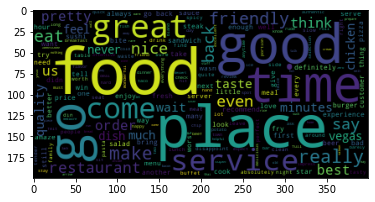

In [34]:
plt.imshow(text_wc)

# BOW Of WORDS 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer ##countvectorizer is bag of words class

In [36]:
cv = CountVectorizer()

In [37]:
x = cv.fit_transform(corpus).toarray()

In [38]:
x.shape

(1000, 1654)

In [39]:
cv.get_feature_names()

['absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodations',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledge',
 'across',
 'actual',
 'actually',
 'add',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almonds',
 'almost',
 'alone',
 'also',
 'although',
 'always',
 'amaze',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'annoy',
 'another',
 'anticipate',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appal',
 'apparently',
 'appeal',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'area',
 'arepas',
 'aria',
 'around',
 'array',
 'arrive',
 'article',
 'ask',
 'assure',
 'atmosphere',
 'atrocious',
 'attach',
 'attack',
 'attention',
 'attentive',
 'attitudes',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'awkwardly',
 'ayce',


In [40]:
pd.DataFrame(x,columns=cv.get_feature_names())

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledge,...,years,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y=data['Liked'].values

In [42]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Building an ANN model 

In [45]:
import keras
from keras.models import Sequential  
from keras.layers import Dense

Using TensorFlow backend.


In [61]:
model= Sequential()

In [62]:
model.add(Dense(input_dim=x_train.shape[1],kernel_initializer='random_uniform',activation='relu',units=200))


In [63]:
model.add(Dense(kernel_initializer='random_uniform',activation='relu',units=200))

In [64]:
#model.add(Dense(kernel_initializer='random_uniform',activation='softmax',units=10))

In [65]:
model.add(Dense(kernel_initializer='random_uniform',activation='sigmoid',units=1))

In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               331000    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 201       
Total params: 371,401
Trainable params: 371,401
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
800/800 [==============================] - 0s 431us/step - loss: 0.6860 - accuracy: 0.5700
Epoch 2/5
800/800 [==============================] - 0s 337us/step - loss: 0.5422 - accuracy: 0.8375
Epoch 3/5
800/800 [==============================] - 0s 318us/step - loss: 0.2062 - accuracy: 0.9563
Epoch 4/5
800/800 [==============================] - 0s 302us/step - loss: 0.0596 - accuracy: 0.9812
Epoch 5/5
800/800 [==============================] - 0s 374us/step - loss: 0.0241 - accuracy: 0.9950


In [69]:
y_pred=model.predict_classes(x_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.83

In [72]:
y_pred

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
    

# Real Time prediction

In [73]:
review='food is not good'

In [74]:
xtest=cv.transform([review])

In [75]:
model.predict_classes(xtest)

array([[0]])

In [76]:
model.save('review.h5')

In [77]:
import joblib

In [78]:
joblib.dump(cv,'cv_sentimental.pkl')

['cv_sentimental.pkl']